## DATASETS WITH GENRES - probs not using anything in this notebook tbh

I'll use this for another project maybe ... the graphs are kind of fun

This first dataset includes the artist and what genres they cover, as well as I guess their typical levels of song features. I'm guessing these are all averages since the artists have multiple songs in their discography (seen in the count column I believe)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn.objects as so

In [3]:
df3 = pd.read_csv('data_w_genres.csv')
df3.head(10)

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
5,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.609556,0.487278,205091.944444,0.309906,0.004696,0.274767,-18.266389,0.098022,118.648944,0.441556,32.777778,5,1,36
6,[],"""Mama"" Helen Teagarden",0.725000,0.637000,135533.000000,0.512000,0.186000,0.426000,-20.615000,0.210000,134.819000,0.885000,0.000000,8,1,2
7,[],"""Test for Victor Young""",0.927000,0.734000,175693.000000,0.474000,0.076200,0.737000,-10.544000,0.256000,132.788000,0.902000,3.000000,10,1,2
8,"['comedy rock', 'comic', 'parody']","""Weird Al"" Yankovic",0.173145,0.662787,218948.196721,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,1,122
9,"['emo rap', 'florida rap', 'sad rap', 'undergr...",$NOT,0.544467,0.789800,137910.466667,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,15


In [4]:
df3.tail()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
28675,[],麥志誠,0.512000,0.356000,198773.000000,0.3060,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.0,10,1,2
28676,"['c-pop', 'classic cantopop', 'classic mandopo...",黃品源,0.541000,0.578000,293840.000000,0.3340,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.0,9,0,2
28677,[],黃國隆,0.785455,0.570818,174582.727273,0.1484,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.0,5,1,11
28678,"['chinese indie', 'chinese indie rock']",黑豹,0.381000,0.353000,316160.000000,0.6860,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.0,11,1,2
28679,['classic korean pop'],조정현,0.568000,0.447000,237688.000000,0.2150,0.000001,0.064900,-16.478000,0.027200,71.979000,0.177000,31.0,10,1,2


df3.info()

In [6]:
df3["popularity"].describe()

count    28680.000000
mean        34.060945
std         22.376438
min          0.000000
25%         12.000000
50%         39.000000
75%         51.000000
max         93.000000
Name: popularity, dtype: float64

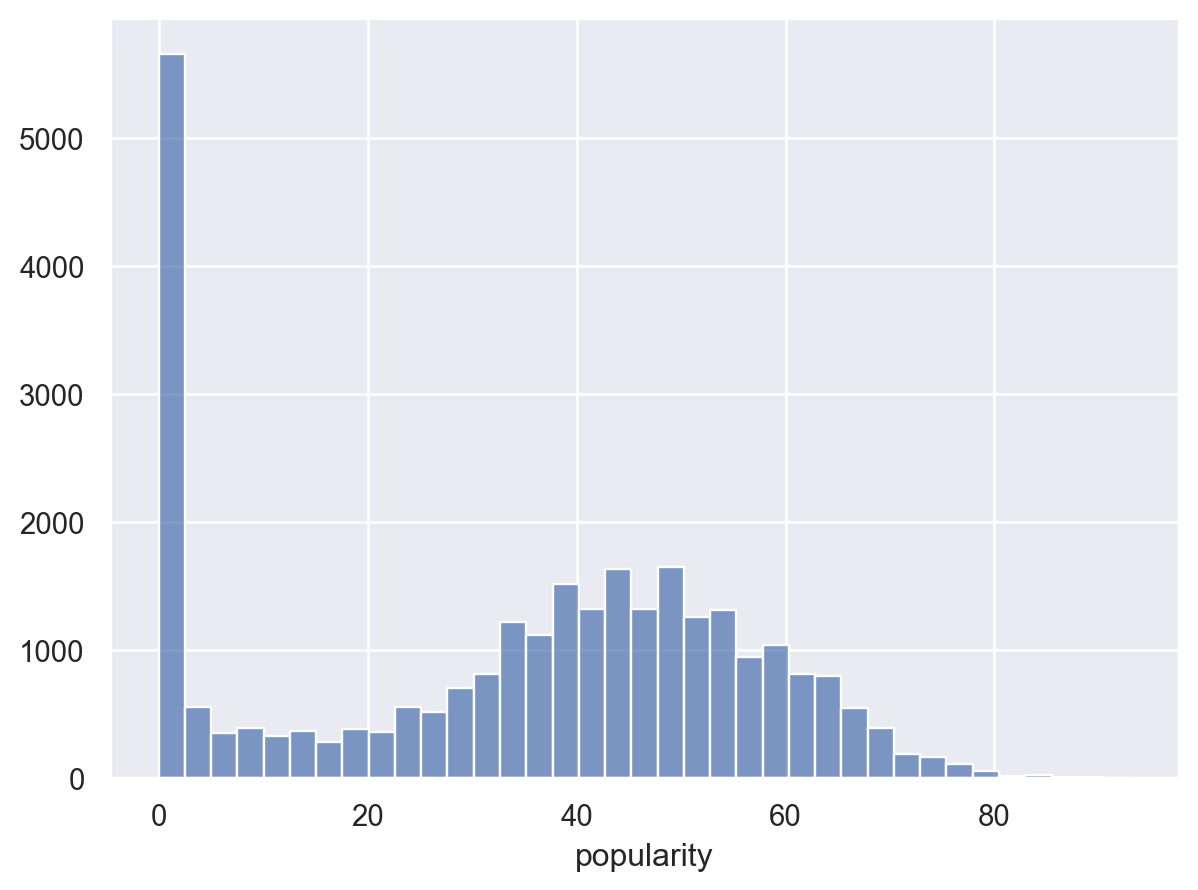

In [7]:
p = so.Plot(df3, "popularity")
p.add(so.Bars(), so.Hist())

^^ This is similar to the other dataset without genres

# Looking at the second set of data - genres
This is a list of each specific genre and how it's classified - there are 2,973 total genres which is a lot. Going to try to cluster them into groups for easier classification

In [8]:
df2 = pd.read_csv('data_by_genres.csv')
df2.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [10]:
df2["genres"].value_counts()

genres
21st century classical    1
north carolina roots      1
nordic soundtrack         1
norman ok indie           1
norsk lovsang             1
                         ..
ethio-jazz                1
ethiopian pop             1
ethnomusicology           1
ethnotronica              1
zydeco                    1
Name: count, Length: 2973, dtype: int64

In [11]:
top_10_genres = df2.nlargest(10, 'popularity')
top_10_genres

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
237,1,basshall,0.213167,0.81800,169799.166667,0.630167,0.000020,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
2533,1,south african house,0.043833,0.84700,311854.333333,0.562333,0.130339,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2755,1,trap venezolano,0.044600,0.87700,231848.000000,0.777000,0.000035,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
2778,0,turkish edm,0.008290,0.69800,186700.000000,0.719000,0.000004,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
46,0,alberta hip hop,0.330000,0.88500,144000.000000,0.685000,0.000000,0.148000,-6.429000,0.062700,99.954000,0.937000,78.500000,11
536,0,chinese electropop,0.002570,0.66000,217088.000000,0.787000,0.000000,0.323000,-4.592000,0.032000,142.018000,0.199000,78.500000,1
37,0,afroswing,0.318450,0.71175,179995.375000,0.580187,0.000258,0.189950,-7.016687,0.195563,83.250125,0.676625,77.312500,11
31,0,afro soul,0.006270,0.76600,202627.000000,0.873000,0.000000,0.076400,-6.381000,0.143000,126.988000,0.743000,77.000000,11
575,1,circuit,0.009030,0.74500,189818.000000,0.972000,0.465000,0.297000,-3.506000,0.077400,128.031000,0.556000,77.000000,7
1239,1,guaracha,0.009030,0.74500,189818.000000,0.972000,0.465000,0.297000,-3.506000,0.077400,128.031000,0.556000,77.000000,7


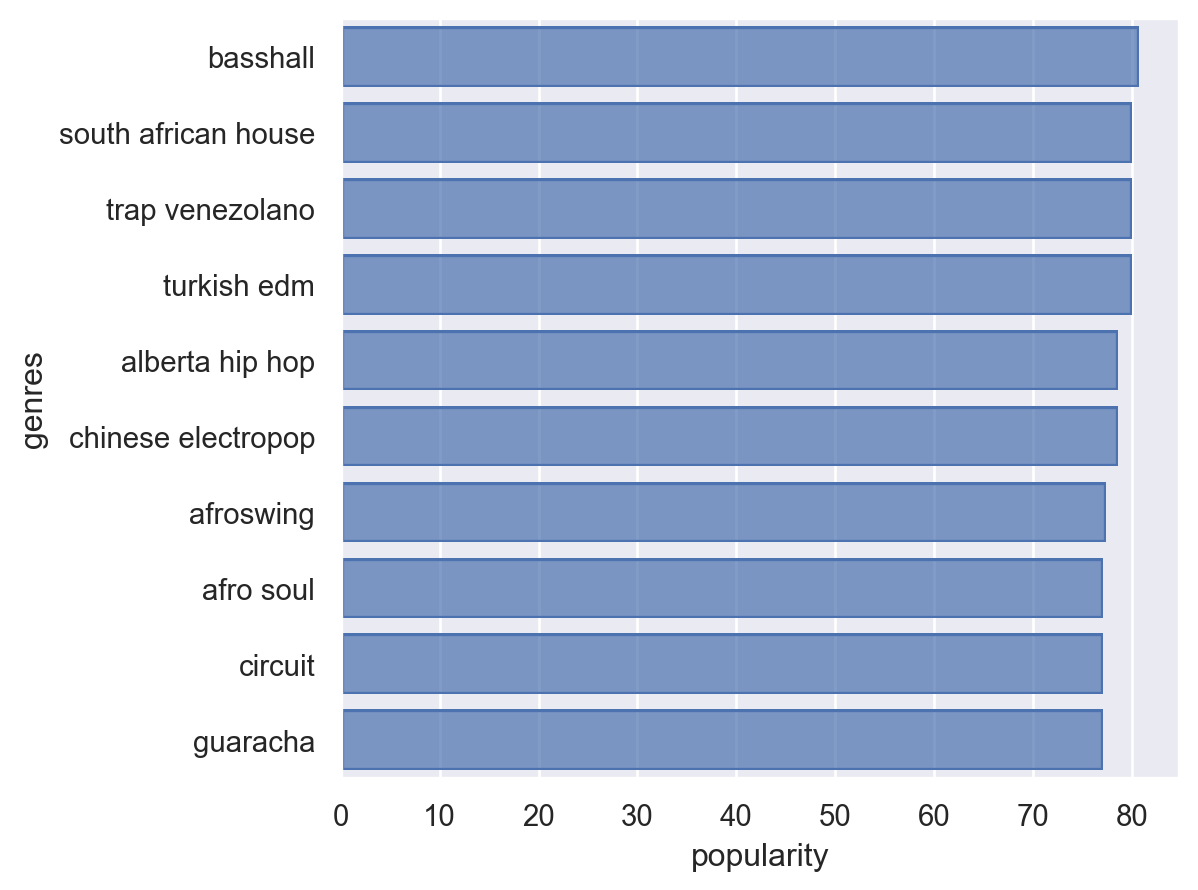

In [12]:
so.Plot(x=top_10_genres['popularity'], y=top_10_genres['genres']).add(so.Bar())

# df2 Modeling Preprocessing

In [13]:
# train test split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

X = df2.drop(labels= 'genres', axis=1)
y = df2['genres']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)

X_train.head()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
1049,1,0.010704,0.710667,399675.000000,0.813000,0.904667,0.285533,-9.201000,0.054667,125.672667,0.362167,0.000000,1
2001,0,0.196888,0.565848,218491.854545,0.663547,0.020752,0.175366,-6.749458,0.060056,121.162266,0.427620,62.232576,8
1060,1,0.400800,0.539787,222573.060854,0.511149,0.052462,0.193413,-11.216327,0.051595,119.768685,0.599397,35.033745,7
559,1,0.143130,0.473151,233626.008687,0.783715,0.023805,0.214795,-6.790499,0.074599,129.169709,0.430115,40.211261,8
2048,1,0.563040,0.267683,173586.500000,0.149221,0.475504,0.113003,-20.991694,0.037639,101.238264,0.096908,39.611111,9


In [14]:
y.head()

0    21st century classical
1                     432hz
2                     8-bit
3                        []
4                a cappella
Name: genres, dtype: object

In [15]:
subpipe_num = Pipeline(steps=[('ss', StandardScaler())])
subpipe_cat = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [16]:
from sklearn.compose import ColumnTransformer

numeric_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',	
                   'liveness', 'loudness',	'speechiness',	'tempo', 'valence',	'popularity']

cat_columns = ['key']

CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, numeric_columns),
                                         ('subpipe_cat', subpipe_cat, cat_columns)],
                           remainder='passthrough')


pipe = Pipeline(steps=[('ct', CT)])

In [17]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence', 'popularity']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['key'])]))])

In [18]:
X_train_processed = pipe.transform(X_train)
X_test_processed = pipe.transform(X_test)
X_train_processed

array([[-1.21258874,  1.14603842,  1.95818535, ...,  0.        ,
         0.        ,  1.        ],
       [-0.62452882,  0.1709561 , -0.40823184, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01952065, -0.00451659, -0.35492756, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.20419372, -0.23873854, -1.41451447, ...,  0.        ,
         1.        ,  1.        ],
       [-0.96002394, -1.06144248,  0.6893825 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.24527473, -1.82399394, -0.03641276, ...,  0.        ,
         1.        ,  1.        ]])

# PCA 
will probably not use this since there aren't that many features .... I guess this was a learning experience though?

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5, random_state = 27)
pca.fit(X_train_processed)
X_train_pca = pca.transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

print(f' Explained Variance Ratio: {pca.explained_variance_ratio_}')
print(f' Singular Values: {pca.singular_values_}')

 Explained Variance Ratio: [0.3210076  0.13182102 0.10505433 0.08276009 0.07211496]
 Singular Values: [92.75459775 59.43881294 53.06214003 47.09646001 43.9633195 ]


In [21]:
features = pca.get_feature_names_out()
print(features)
print(pca.components_)

['pca0' 'pca1' 'pca2' 'pca3' 'pca4']
[[ 4.17340791e-01 -3.06878955e-01  9.16707872e-02 -4.39646208e-01
   3.22258286e-01 -5.28988271e-02 -4.59897845e-01 -8.94609095e-02
  -2.58318719e-01 -2.74349766e-01 -2.46049742e-01  5.58471833e-03
  -1.08989990e-02  7.35064822e-03  7.39320308e-03 -1.88293614e-03
   1.56363040e-02 -6.63932365e-03  7.87512987e-03  1.14110135e-03
  -1.02525967e-02  3.06043438e-03 -1.83676837e-02  1.41026795e-02]
 [ 3.24977581e-01  4.33260867e-01 -3.79870484e-01 -2.65859928e-01
  -2.73876202e-01 -8.91915511e-02 -1.02804994e-01  2.19822503e-01
  -2.20966905e-01  5.04799921e-01 -2.09508149e-01  7.84167030e-03
  -7.76766639e-03 -1.72848804e-02 -9.21315660e-04 -2.39249158e-03
   8.07541515e-03  4.64655449e-03  3.09782012e-02  5.92450338e-03
  -1.13487095e-02  2.94541309e-03 -2.06966940e-02  1.48276911e-02]
 [-6.24986724e-03 -1.60644508e-02  2.92752698e-01  8.50691180e-02
  -1.71165726e-02  6.47677368e-01  2.16113742e-02  6.14478214e-01
  -9.86674976e-02 -4.45806075e-02 -3.

In [22]:
# Create a DataFrame with the PCA results
pca_columns = [f'PC{i+1}' for i in range(5)]
train_pca_df = pd.DataFrame(data=X_train_pca, columns=pca_columns)
train_pca_df['target'] = y
train_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,target
0,0.236916,-1.762351,1.804780,0.304047,-2.962007,21st century classical
1,-1.322724,-0.506545,-0.741618,0.204716,1.031354,432hz
2,-0.074364,0.628611,-0.306088,-0.504281,-0.105577,8-bit
3,-1.223415,-0.849275,0.104827,-0.691492,0.165700,[]
4,3.619887,-0.677721,-1.188270,-0.311913,1.406401,a cappella


In [23]:
test_pca_df = pd.DataFrame(data=X_test_pca, columns=pca_columns)
test_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.815544,-1.565074,-0.884750,-0.921571,-0.253781
1,-0.637406,-2.259289,0.532548,-0.183204,-0.262940
2,0.632737,0.601393,-0.266515,-0.568964,0.120942
3,4.391223,0.439623,-0.285569,-0.317248,0.780992
4,-0.942282,-0.153397,3.914298,0.318234,-2.303580


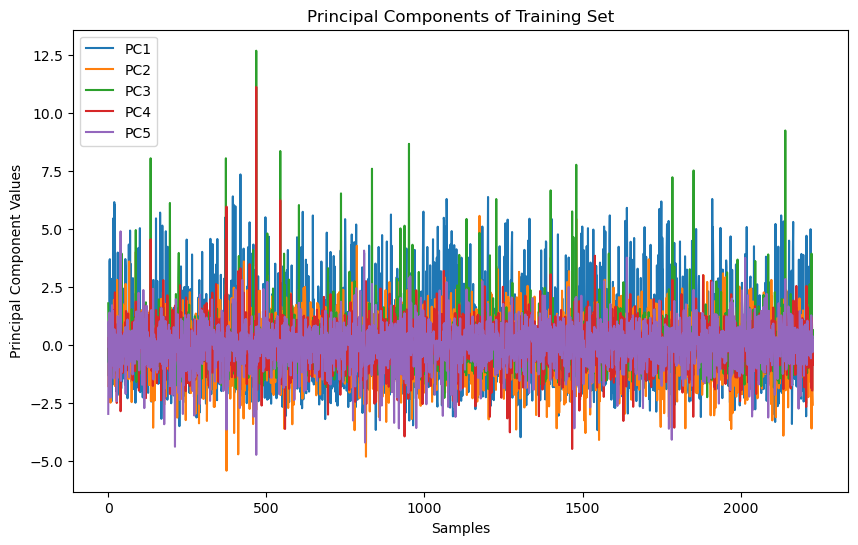

In [24]:
# Plot all principal components
plt.figure(figsize=(10, 6))
for i in range(X_train_pca.shape[1]):
    plt.plot(X_train_pca[:, i], label=f'PC{i+1}')

plt.title('Principal Components of Training Set')
plt.xlabel('Samples')
plt.ylabel('Principal Component Values')
plt.legend()
plt.show()

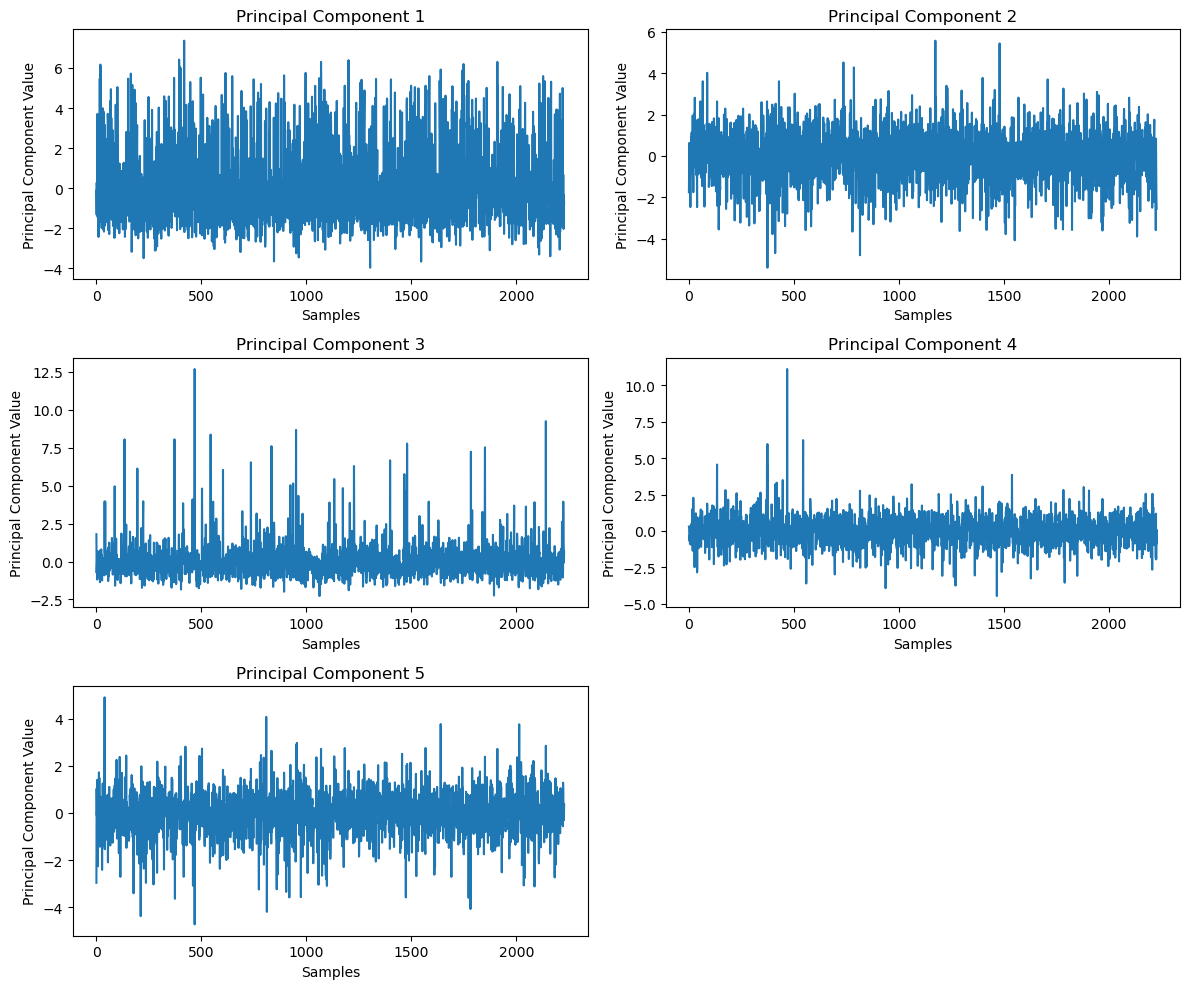

In [25]:
# Plot each principal component in a separate subplot
plt.figure(figsize=(12, 10))

for i in range(X_train_pca.shape[1]):
    plt.subplot(3, 2, i+1)
    plt.plot(X_train_pca[:, i])
    plt.title(f'Principal Component {i+1}')
    plt.xlabel('Samples')
    plt.ylabel('Principal Component Value')

plt.tight_layout()
plt.show()


# Grid Search
not using pca components

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [28]:
# Setup grid for search
kmeans = KMeans(random_state=27)
params = {'n_clusters': [1, 5, 10, 20]}

# Instantiate grid search object
grid_kmeans = GridSearchCV(estimator=kmeans, param_grid=params, cv=5)

# Fit and get best model
grid_kmeans.fit(X_train_processed) 
best_estimator = grid_kmeans.best_estimator_

print(grid_kmeans.best_params_)

{'n_clusters': 20}


^^ this is unsurprising since more clusters will be more accurate

# K Means

In [29]:
kmeans = KMeans(n_clusters=20, random_state=27,).fit(X_train_processed)
kmeans_x = kmeans.transform(X_train_processed)

In [30]:
# Predict the cluster labels for X_train_processed
cluster_labels = kmeans.predict(X_train_processed)

# Create a DataFrame with the cluster labels
kmeans_df = pd.DataFrame(cluster_labels, columns=['cluster_label'])

# Concatenate the cluster labels DataFrame with X_train_processed DataFrame
kmeans_df = pd.concat([pd.DataFrame(X_train_processed), kmeans_df], axis=1)

kmeans_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,cluster_label
0,-1.212589,1.146038,1.958185,1.073455,2.618919,1.003330,0.234608,-0.353971,0.384459,-0.674581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
1,-0.624529,0.170956,-0.408232,0.428650,-0.698323,-0.191354,0.694441,-0.289920,0.127503,-0.348048,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17
2,0.019521,-0.004517,-0.354928,-0.228864,-0.579320,0.004349,-0.143404,-0.390475,0.048111,0.508904,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12
3,-0.794322,-0.453184,-0.210566,0.947108,-0.686866,0.236220,0.686743,-0.117090,0.583685,-0.335602,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19
4,0.531953,-1.836619,-0.994737,-1.790378,1.008316,-0.867642,-1.976955,-0.556339,-1.007564,-1.997893,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,13


In [31]:
X_train.head()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
1049,1,0.010704,0.710667,399675.000000,0.813000,0.904667,0.285533,-9.201000,0.054667,125.672667,0.362167,0.000000,1
2001,0,0.196888,0.565848,218491.854545,0.663547,0.020752,0.175366,-6.749458,0.060056,121.162266,0.427620,62.232576,8
1060,1,0.400800,0.539787,222573.060854,0.511149,0.052462,0.193413,-11.216327,0.051595,119.768685,0.599397,35.033745,7
559,1,0.143130,0.473151,233626.008687,0.783715,0.023805,0.214795,-6.790499,0.074599,129.169709,0.430115,40.211261,8
2048,1,0.563040,0.267683,173586.500000,0.149221,0.475504,0.113003,-20.991694,0.037639,101.238264,0.096908,39.611111,9


attempting to join the clusters to the original train set so we have cluster labels for each genre

In [32]:
X_train.reset_index(inplace=True)
X_train.head()

,index,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1049,1,0.010704,0.710667,399675.000000,0.813000,0.904667,0.285533,-9.201000,0.054667,125.672667,0.362167,0.000000,1
1,2001,0,0.196888,0.565848,218491.854545,0.663547,0.020752,0.175366,-6.749458,0.060056,121.162266,0.427620,62.232576,8
2,1060,1,0.400800,0.539787,222573.060854,0.511149,0.052462,0.193413,-11.216327,0.051595,119.768685,0.599397,35.033745,7
3,559,1,0.143130,0.473151,233626.008687,0.783715,0.023805,0.214795,-6.790499,0.074599,129.169709,0.430115,40.211261,8
4,2048,1,0.563040,0.267683,173586.500000,0.149221,0.475504,0.113003,-20.991694,0.037639,101.238264,0.096908,39.611111,9


In [33]:
# joins automatically on index
X_train_clusters = X_train.join(kmeans_df['cluster_label'])
X_train_clusters.head()

,index,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster_label
0,1049,1,0.010704,0.710667,399675.000000,0.813000,0.904667,0.285533,-9.201000,0.054667,125.672667,0.362167,0.000000,1,2
1,2001,0,0.196888,0.565848,218491.854545,0.663547,0.020752,0.175366,-6.749458,0.060056,121.162266,0.427620,62.232576,8,17
2,1060,1,0.400800,0.539787,222573.060854,0.511149,0.052462,0.193413,-11.216327,0.051595,119.768685,0.599397,35.033745,7,12
3,559,1,0.143130,0.473151,233626.008687,0.783715,0.023805,0.214795,-6.790499,0.074599,129.169709,0.430115,40.211261,8,19
4,2048,1,0.563040,0.267683,173586.500000,0.149221,0.475504,0.113003,-20.991694,0.037639,101.238264,0.096908,39.611111,9,13


In [34]:
# putting the target back in to see the original genres
genres_df = pd.DataFrame(y_train)
genres_df.head()

,genres
1049,focus trance
2001,norwegian pop
1060,folk rock
559,christian metal
2048,oceania soundtrack


In [35]:
genres_cluster_df = X_train_clusters.join(genres_df)
genres_cluster_df.head()

,index,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster_label,genres
0,1049,1,0.010704,0.710667,399675.000000,0.813000,0.904667,0.285533,-9.201000,0.054667,125.672667,0.362167,0.000000,1,2,21st century classical
1,2001,0,0.196888,0.565848,218491.854545,0.663547,0.020752,0.175366,-6.749458,0.060056,121.162266,0.427620,62.232576,8,17,432hz
2,1060,1,0.400800,0.539787,222573.060854,0.511149,0.052462,0.193413,-11.216327,0.051595,119.768685,0.599397,35.033745,7,12,8-bit
3,559,1,0.143130,0.473151,233626.008687,0.783715,0.023805,0.214795,-6.790499,0.074599,129.169709,0.430115,40.211261,8,19,[]
4,2048,1,0.563040,0.267683,173586.500000,0.149221,0.475504,0.113003,-20.991694,0.037639,101.238264,0.096908,39.611111,9,13,a cappella


In [39]:
cluster_values = genres_cluster_df['cluster_label'].value_counts(ascending=False)
cluster_values

cluster_label
17    262
1     185
19    178
7     178
12    174
8     165
6     149
3     128
0     104
5     101
10     96
15     87
13     78
9      73
4      69
16     61
14     51
18     37
2      34
11     19
Name: count, dtype: int64

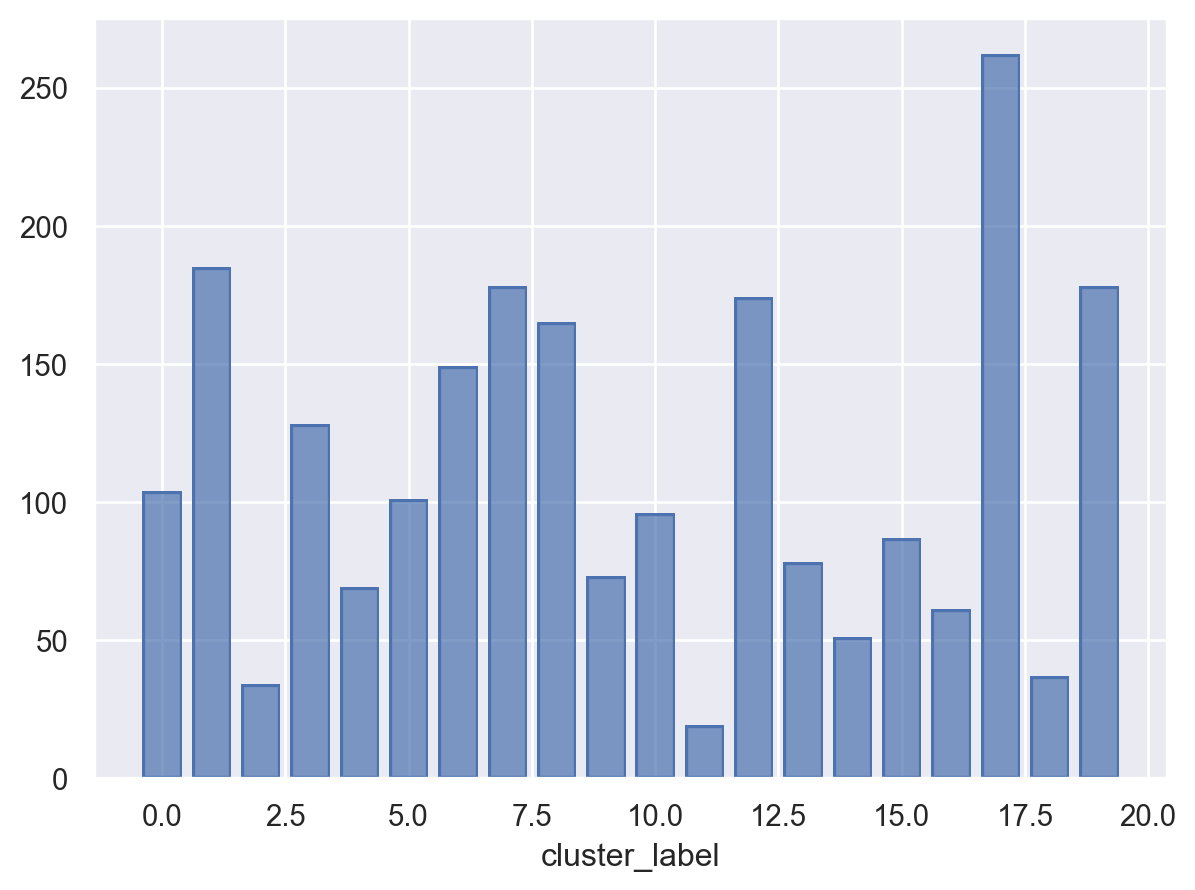

In [37]:
so.Plot(x=cluster_values.index, y=cluster_values.values).add(so.Bar())

cluster 17 is the most common, however since our clusters don't have labels it's a little hard to decipher what each cluster represents as far as genres go ... will probably not use anything from this notebook